# Rouen Cathedral: Monet + Async

<p align="center">
  <img src="./images/256px/Claude_Monet_-_The_Rouen_Cathedral_at_Sunset_-_Pushkin_museum.jpg" />
</p>

<p style="text-align: center;">
  <em>Le Cathédrale de Rouen (<a href="https://commons.wikimedia.org/wiki/File:Claude_Monet_-_The_Rouen_Cathedral_at_Sunset_-_Pushkin_museum.jpg">W 1326</a>)</em>
</p>

# Contents<a id="contents"></a>

* [References](#references)
* [Data](#references)
* [Generation of Images](#images-generation)
  * [Test: Morning — Day — Evening](#test-all-paintings)
  * [Test: Alpha](#test-alpha)
  * [Pipeline](#pipeline)
* [[TODO] Postprocessing](#postprocessing)
* [GIF](#gif)
  * [Ideas](#gif-ideas)
  * [ImageMagick](#imagemagick)
  * [Hosting](#gif-hosting)

## References<a id="references"></a>

* [Русская Вики](https://ru.wikipedia.org/wiki/%D0%A0%D1%83%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%81%D0%BE%D0%B1%D0%BE%D1%80_(%D1%81%D0%B5%D1%80%D0%B8%D1%8F_%D0%BA%D0%B0%D1%80%D1%82%D0%B8%D0%BD))

## Data<a id="data"></a>
<div style="text-align: right;"><a href=#contents>Back to Contents</a></div>

In [ ]:
import os

import matplotlib.image as mpimg  # https://matplotlib.org/stable/tutorials/introductory/images.html
import matplotlib.pyplot as plt
import tqdm

%matplotlib inline

In [2]:
ROUEN_MORNING_FR_FILE_NAME = 'Claude_Monet_-_Rouen_Cathedral%2C_Facade_%28Morning_effect%29.JPG'
ROUEN_DAY_FR_FILE_NAME = 'Rouen_Cathedral_Boston_W1356.jpg'
ROUEN_EVENING_FR_FILE_NAME = 'Claude_Monet_-_Rouen_Cathedral%2C_Facade_I.jpg'

ROUEN_MORNING_FR_FILE_URL = f'https://upload.wikimedia.org/wikipedia/commons/d/de/{ROUEN_MORNING_FR_FILE_NAME}'
ROUEN_DAY_FR_FILE_URL = f'https://upload.wikimedia.org/wikipedia/commons/6/65/{ROUEN_DAY_FR_FILE_NAME}'
ROUEN_EVENING_FR_FILE_URL = f'https://upload.wikimedia.org/wikipedia/commons/3/3b/{ROUEN_EVENING_FR_FILE_NAME}'

In [3]:
IMAGES_FULL_RESOLUTION_FOLDER_PATH = os.path.join('images', 'full_resolution')

os.makedirs(IMAGES_FULL_RESOLUTION_FOLDER_PATH, exist_ok=True)

In [4]:
for file_name, file_url in zip(
        [ROUEN_MORNING_FR_FILE_NAME, ROUEN_DAY_FR_FILE_NAME, ROUEN_EVENING_FR_FILE_NAME],
        [ROUEN_MORNING_FR_FILE_URL, ROUEN_DAY_FR_FILE_URL, ROUEN_EVENING_FR_FILE_URL]
        ):

    ! curl -O $file_url
    ! mv $file_name $IMAGES_FULL_RESOLUTION_FOLDER_PATH

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 49 4911k   49 2438k    0     0  1275k      0  0:00:03  0:00:01  0:00:02 1274k
100 4911k  100 4911k    0     0  2038k      0  0:00:02  0:00:02 --:--:-- 2038k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  824k    0  6938    0     0  20587      0  0:00:40 --:--:--  0:00:40 20587
100  824k  100  824k    0     0  1149k      0 --:--:-- --:--:-- --:--:-- 1147k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   

In [5]:
os.listdir(IMAGES_FULL_RESOLUTION_FOLDER_PATH)

['Claude_Monet_-_Rouen_Cathedral%2C_Facade_%28Morning_effect%29.JPG',
 'Claude_Monet_-_Rouen_Cathedral%2C_Facade_I.jpg',
 'Rouen_Cathedral_Boston_W1356.jpg']

In [6]:
ROUEN_MORNING_256PX_FILE_NAME = '256px-Claude_Monet_-_Rouen_Cathedral%2C_Facade_%28Morning_effect%29.JPG'
ROUEN_DAY_256PX_FILE_NAME = '256px-Rouen_Cathedral_Boston_W1356.jpg'
ROUEN_EVENING_256PX_FILE_NAME = '256px-Claude_Monet_-_Rouen_Cathedral%2C_Facade_I.jpg'

ROUEN_MORNING_256PX_FILE_URL = f'https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/{ROUEN_MORNING_FR_FILE_NAME}/{ROUEN_MORNING_256PX_FILE_NAME}'
ROUEN_DAY_256PX_FILE_URL = f'https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/{ROUEN_DAY_FR_FILE_NAME}/{ROUEN_DAY_256PX_FILE_NAME}'
ROUEN_EVENING_256PX_FILE_URL = f'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/{ROUEN_EVENING_FR_FILE_NAME}/{ROUEN_EVENING_256PX_FILE_NAME}'

In [7]:
IMAGES_256PX_FOLDER_PATH = os.path.join('images', '256px')

os.makedirs(IMAGES_256PX_FOLDER_PATH, exist_ok=True)

In [8]:
for file_name, file_url in zip(
        [ROUEN_MORNING_256PX_FILE_NAME, ROUEN_DAY_256PX_FILE_NAME, ROUEN_EVENING_256PX_FILE_NAME],
        [ROUEN_MORNING_256PX_FILE_URL, ROUEN_DAY_256PX_FILE_URL, ROUEN_EVENING_256PX_FILE_URL]
        ):

    ! curl -O $file_url
    ! mv $file_name $IMAGES_256PX_FOLDER_PATH

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22017  100 22017    0     0  66516      0 --:--:-- --:--:-- --:--:-- 66516
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 55010  100 55010    0     0   113k      0 --:--:-- --:--:-- --:--:--  113k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 26074  100 26074    0     0  69530      0 --:

In [9]:
os.listdir(IMAGES_256PX_FOLDER_PATH)

['256px-Claude_Monet_-_Rouen_Cathedral%2C_Facade_%28Morning_effect%29.JPG',
 '256px-Claude_Monet_-_Rouen_Cathedral%2C_Facade_I.jpg',
 '256px-Rouen_Cathedral_Boston_W1356.jpg',
 'Claude_Monet_-_The_Rouen_Cathedral_at_Sunset_-_Pushkin_museum.jpg']

In [10]:
ROUEN_MORNING_FILE_PATH = os.path.join(
    IMAGES_256PX_FOLDER_PATH, ROUEN_MORNING_256PX_FILE_NAME
)
ROUEN_DAY_FILE_PATH = os.path.join(
    IMAGES_256PX_FOLDER_PATH, ROUEN_DAY_256PX_FILE_NAME
)
ROUEN_EVENING_FILE_PATH = os.path.join(
    IMAGES_256PX_FOLDER_PATH, ROUEN_EVENING_256PX_FILE_NAME
)


assert all(
    os.path.isfile(p)
    for p in [ROUEN_MORNING_FILE_PATH, ROUEN_DAY_FILE_PATH, ROUEN_EVENING_FILE_PATH]
)

In [11]:
PAINTINGS_FILE_PATHS = [ROUEN_MORNING_FILE_PATH, ROUEN_DAY_FILE_PATH, ROUEN_EVENING_FILE_PATH]

## Generation of Images<a id="images-generation"></a>
<div style="text-align: right;"><a href=#contents>Back to Contents</a></div>

### Test: Morning — Day — Evening<a id="test-all-paintings"></a>

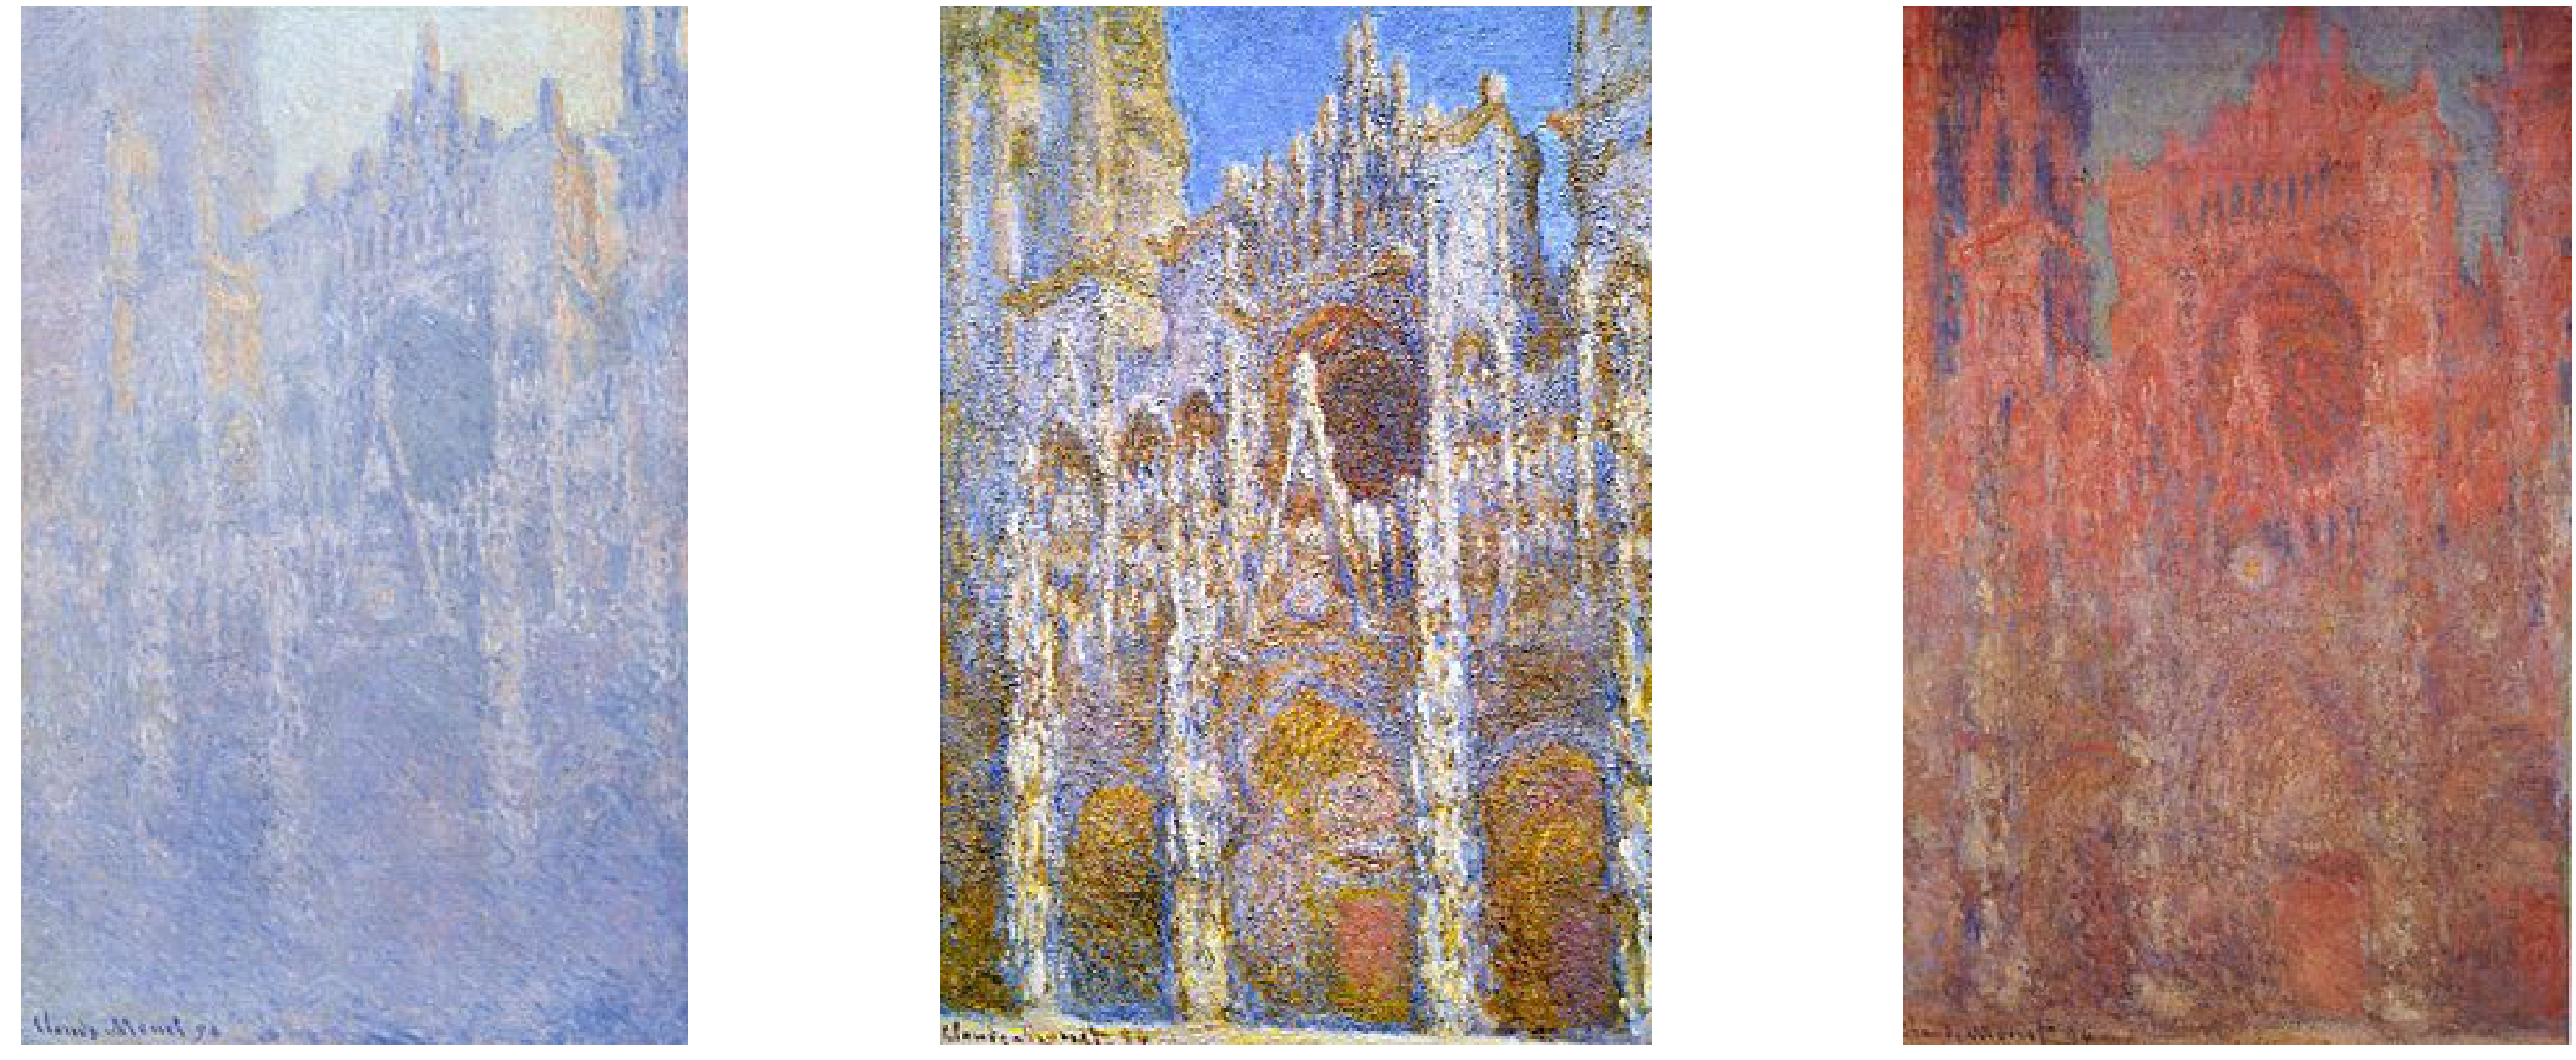

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(3 * 25, 30))

for image_path, ax in zip(PAINTINGS_FILE_PATHS, axes):
    image = mpimg.imread(image_path)
    ax.imshow(image)
    ax.axis('off')

plt.show()

### Test: Alpha<a id="test-alpha"></a>
<div style="text-align: right;"><a href=#contents>Back to Contents</a></div>

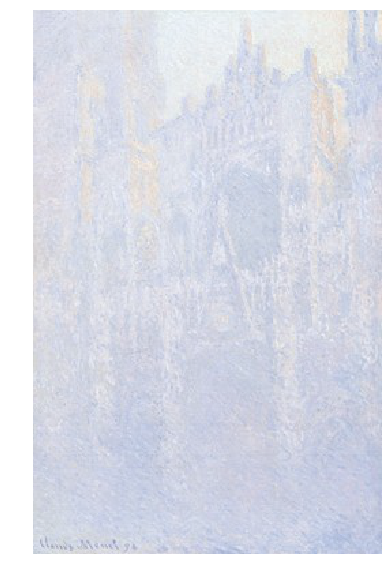

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

image = mpimg.imread(ROUEN_MORNING_FILE_PATH)
plt.imshow(image, alpha=0.5)
plt.axis('off')

plt.show()

### Pipeline<a id="pipeline"></a>
<div style="text-align: right;"><a href=#contents>Back to Contents</a></div>

In [14]:
ALPHAS = [
    # Start (before Sync)
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    
    
    
    # Sync: first (morning) painting
    # Sync: 1st day
    [0.2, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.3, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.4, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.4, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.4, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.4, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.4, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.4, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.4, 0.1, 0.1, 0.1, 0.1, 0.1],
    
    # Sync: 2nd day
    [0.5, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.6, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.7, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.7, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.7, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.7, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.7, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.7, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.7, 0.1, 0.1, 0.1, 0.1, 0.1],
    
    # Sync: 3d day
    [0.8, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.9, 0.1, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.1, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.1, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.1, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.1, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.1, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.1, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.1, 0.1, 0.1, 0.1, 0.1],
    
    
    # Sync: second (day) painting
    # Sync: 4th day
    [1.0, 0.2, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.3, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.4, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.4, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.4, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.4, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.4, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.4, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.4, 0.1, 0.1, 0.1, 0.1],
    
    # Sync: 5th day
    [1.0, 0.5, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.6, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.7, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.7, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.7, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.7, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.7, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.7, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.7, 0.1, 0.1, 0.1, 0.1],
    
    # Sync: 6th day
    [1.0, 0.8, 0.1, 0.1, 0.1, 0.1],
    [1.0, 0.9, 0.1, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.1, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.1, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.1, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.1, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.1, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.1, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.1, 0.1, 0.1, 0.1],
    
    
    # Sync: third (evening) painting
    # Sync: 7th day
    [1.0, 1.0, 0.2, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.3, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.4, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.4, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.4, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.4, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.4, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.4, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.4, 0.1, 0.1, 0.1],
    
    # Sync: 8th day
    [1.0, 1.0, 0.5, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.6, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.7, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.7, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.7, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.7, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.7, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.7, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.7, 0.1, 0.1, 0.1],
    
    # Sync: 9th day
    [1.0, 1.0, 0.8, 0.1, 0.1, 0.1],
    [1.0, 1.0, 0.9, 0.1, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.1, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.1, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.1, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.1, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.1, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.1, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.1, 0.1, 0.1],
    
    
    # Before Async
    [1.0, 1.0, 1.0, 0.1, 0.1, 0.1],
    
    
    
    # Async: 1st day
    [1.0, 1.0, 1.0, 0.2, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.3, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.4, 0.1, 0.1],
    [1.0, 1.0, 1.0, 0.4, 0.2, 0.1],
    [1.0, 1.0, 1.0, 0.4, 0.3, 0.1],
    [1.0, 1.0, 1.0, 0.4, 0.4, 0.1],
    [1.0, 1.0, 1.0, 0.4, 0.4, 0.2],
    [1.0, 1.0, 1.0, 0.4, 0.4, 0.3],
    [1.0, 1.0, 1.0, 0.4, 0.4, 0.4],
    
    # Async: 2nd day
    [1.0, 1.0, 1.0, 0.5, 0.4, 0.4],
    [1.0, 1.0, 1.0, 0.6, 0.4, 0.4],
    [1.0, 1.0, 1.0, 0.7, 0.4, 0.4],
    [1.0, 1.0, 1.0, 0.7, 0.5, 0.4],
    [1.0, 1.0, 1.0, 0.7, 0.6, 0.4],
    [1.0, 1.0, 1.0, 0.7, 0.7, 0.4],
    [1.0, 1.0, 1.0, 0.7, 0.7, 0.5],
    [1.0, 1.0, 1.0, 0.7, 0.7, 0.6],
    [1.0, 1.0, 1.0, 0.7, 0.7, 0.7],
    
    # Async: 3d day
    [1.0, 1.0, 1.0, 0.8, 0.7, 0.7],
    [1.0, 1.0, 1.0, 0.9, 0.7, 0.7],
    [1.0, 1.0, 1.0, 1.0, 0.7, 0.7],
    [1.0, 1.0, 1.0, 1.0, 0.8, 0.7],
    [1.0, 1.0, 1.0, 1.0, 0.9, 0.7],
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.7],
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.8],
    [1.0, 1.0, 1.0, 1.0, 1.0, 0.9],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    
    
    
    # Final: pause (x2 days)
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
]

In [15]:
len(ALPHAS)

128

In [16]:
def plot_pics(alphas):
    num_pipelines = 2
    
    fig, axes = plt.subplots(
        num_pipelines, len(PAINTINGS_FILE_PATHS),
        figsize=(len(PAINTINGS_FILE_PATHS) * 25, num_pipelines * 35)
    )
    
    alphas1 = alphas[:3]
    alphas2 = alphas[3:]

    for row_axes, row_alphas in zip([axes[0], axes[1]], [alphas1, alphas2]):
        for image_path, ax, alpha in zip(PAINTINGS_FILE_PATHS, row_axes, row_alphas):
            image = mpimg.imread(image_path)
            ax.imshow(image, alpha=alpha)

            ax.axis('off')
    
    return fig

In [17]:
GENERATED_IMAGES_FOLDER_PATH = os.path.join('images', 'generated')

os.makedirs(GENERATED_IMAGES_FOLDER_PATH, exist_ok=True)

In [18]:
for image_number, alpha_combination in tqdm.tqdm(enumerate(ALPHAS), total=len(ALPHAS)):
    image_file_name = f'image_{image_number:03}.png'
    image_file_path = os.path.join(GENERATED_IMAGES_FOLDER_PATH, image_file_name)
    
    if os.path.isfile(image_file_path):
        continue

    fig = plot_pics(alpha_combination)
    fig.savefig(
        image_file_path,
        bbox_inches='tight',  # https://stackoverflow.com/questions/11837979/removing-white-space-around-a-saved-image-in-matplotlib
    )

    plt.close(fig)

100%|████████████████████████████████████████| 128/128 [09:19<00:00,  4.37s/it]


In [20]:
os.listdir(GENERATED_IMAGES_FOLDER_PATH)[:8]

['image_000.png',
 'image_001.png',
 'image_002.png',
 'image_003.png',
 'image_004.png',
 'image_005.png',
 'image_006.png',
 'image_007.png']

## Postprocessing<a id="postprocessing"></a>
<div style="text-align: right;"><a href=#contents>Back to Contents</a></div>

Need to draw time axis on each pic...
See an example: [image_with_timeline.svg](./images/image_with_timeline.svg).

TODO: automize (matplotlib?) — make it a part of generarion?

## GIF<a id="gif"></a>
<div style="text-align: right;"><a href=#contents>Back to Contents</a></div>

### Ideas<a id="gif-ideas"></a>

* Imageio ([link](https://stackoverflow.com/a/35943809/8094251))
* Animation ([link1](https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook), [link2](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks))
* ImageMagic
* MS PowerPoint (?)
* LaTeX's Beamer (?)


### Chosen Approach: ImageMagic<a id="imagemagick"></a>

Links:
* [A way to generate GIFs](https://stackoverflow.com/a/753832/8094251)
* [Images with alpha channel](https://legacy.imagemagick.org/Usage/masking/#remove)
* [A bit about OptimizePlus](https://stackoverflow.com/questions/21212152/how-to-make-a-high-quality-animated-image-with-imagemagick)
* [Command line options](https://imagemagick.org/script/command-line-options.php)

Command which was used for .gif file creation:
```bash
magick convert \
  -background white \
  -alpha remove \
  -layers OptimizePlus \
  -delay 10x100 \
  -loop 0 \
  $GENERATED_IMAGES_FOLDER_PATH/* rouen_sync_vs_async.gif
```


### Hosting and Postprocessing (eg. File Size Reduction)<a id="gif-hosting"></a>

[GIPHY](https://giphy.com/)